# Homework 2 MLE and Naive Bayes

## Instructions
Answer the questions and upload your answers to courseville. Answers can be
in Thai or English. Answers can be either typed or handwritten and scanned.
the assignment is divided into several small tasks. Each task is weighted equally
(marked with **T**). For this assignment, each task is awarded 1 points. There are
also optional tasks (marked with **OT**) counts for 0.5 points each.

## MLE
Consider the following very simple model for stock pricing. The price at the end
of each day is the price of the previous day multiplied by a fixed, but unknown,
rate of return, α, with some noise, w. For a two-day period, we can observe the
following sequence <br>
&emsp; $y_2 = \alpha y_1 + w_1$ <br>
&emsp; $y_1 = \alpha y_0 + w_0$ <br>
where the noises $w_0, w_1$ are iid with the distribution $N(0, \sigma^2), y_0 ∼ N(0, \lambda)$
is independent of the noise sequence. $\sigma^2$ and $\lambda$ are known, while $\alpha$ is unknown.

&emsp; **T1.** Find the MLE of the rate of return, α, given the observed price at
the end of each day $y_2, y_1, y_0$. In other words, compute for the value of α that
maximizes $p(y_2, y_1, y_0|\alpha)$ <br>
&emsp; **Hint:** This is a Markov process, e.g. $y_2$ is independent of $y_0$ given $y_1$.
In general, a process is Markov if $p(y_n|y_{n−1}, y_{n−2}, ...) = p(y_n|y_{n−1})$. In other
words, the present is independent of the past $(y_{n−2}, y_{n−3}, ...)$, conditioned on
the immediate past $y_{n−1}$. You may also find the steps of the proof for logistic
regression we did in class useful.

\begin{equation}
\begin{split}
    & N(\mu,\sigma^2) & \; = \; & \frac{e^{\frac{-(x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \\
    \
    \
    & P(y_0,y_1,y_2|\alpha) & \; = \; & P(y_2|y_1)P(y_1|y_0)P(y_0|\alpha) \\
    & & \; = \; & \
    \frac{e^{\frac{-(y_2-\alpha y_1)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \
    \frac{e^{\frac{-(y_1-\alpha y_0)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \
    \frac{e^{\frac{-y_0^2}{2\lambda}}}{\sqrt{2\pi\lambda}} \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
    find \;\; argmax_\alpha & \; log \; P(y_2,y_1,y_0|\alpha) & \\
    argmax_\alpha &  \; log \;  P(y_2|y_1)P(y_1|y_0)P(y_0|\alpha)  & \\
    argmax_\alpha & \; \left(
        \frac{-(y_2-\alpha y_1)^2}{2\sigma^2} + \
        \frac{-(y_1-\alpha y_0)^2}{2\sigma^2} + \
        \frac{-y_0^2}{2\lambda}\
        \right) \
        -log(\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma^2}\sqrt{2\pi\lambda})
        & \\
    & \frac{\partial}{\partial\alpha} \; log \;  P(y_2|y_1)P(y_1|y_0)P(y_0|\alpha) \
    = 0 = -\frac{1}{\sigma^2}(y_2-\alpha y_1)(-y_1) -\frac{1}{\sigma^2}(y_1-\alpha y_0)(-y_0) \\
    & 0 = y_1(y_2-\alpha y_1) + y_0(y_1-\alpha y_0) = y_1y_2 + y_0y_2 - \alpha y_1^2 - \alpha y_0^2 \\
    & \alpha = \frac{y_1y_2 + y_0y_1}{y_1^2+y_0^2} \\
    \therefore \;\; & argmax_\alpha P(y_2,y_1,y_0|\alpha) \;\;\;\; \alpha = \frac{y_1y_2 + y_0y_1}{y_1^2+y_0^2}
\end{split}
\end{equation}

&emsp; **OT1.** Consider the general case, where
$$y_{n+1} = \alpha y_n + w_n \; , \;\;\; n = 0,  1, 2, ...$$
Find the MLE given the observed price $y_{N+1}, y_N , ..., y_0$

\begin{equation}
\begin{split}
    & N(\mu,\sigma^2) & \; = \; & \frac{e^{\frac{-(x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \\
    \
    \
    & P(y_0,y_1,\;...,y_{n+1}|\alpha) & \; = \; & P(y_{n+1}|y_{n})P(y_n|y_{n-1}) \cdots P(y_1|y_0)P(y_0|\alpha) \\
    & & \; = \; & \
    \frac{e^{\frac{-(y_{n+1}-\alpha y_{n})^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \
    \frac{e^{\frac{-(y_{n}-\alpha y_{n-1})^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \
    \cdots
    \frac{e^{\frac{-(y_1-\alpha y_0)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}} \
    \frac{e^{\frac{-y_0^2}{2\lambda}}}{\sqrt{2\pi\lambda}} \\
    & & \; = \; & \
    \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^{n}\frac{1}{\sqrt{2\pi\lambda}}\
    exp\left(\
        -\frac{(y_{n+1}-\alpha y_{n})^2}{2\sigma^2}\
        -\frac{(y_{n}-\alpha y_{n-1})^2}{2\sigma^2}\
        -\cdots\
        -\frac{(y_1-\alpha y_0)^2}{2\sigma^2}\
        -\frac{y_0^2}{2\lambda}
    \right)
\end{split}
\end{equation}

\begin{equation}
\begin{split}
    find \;\; argmax_\alpha & \; log \; P(y_0,y_1,\;...,y_{n+1}|\alpha) & \\
    argmax_\alpha &  \; log \;   P(y_{n+1}|y_{n})P(y_{n}|y_{n-1}) \cdots P(y_1|y_0)P(y_0|\alpha)   & \\
    argmax_\alpha & \; \left(
        -\frac{(y_{n+1}-\alpha y_{n})^2}{2\sigma^2}\
        -\frac{(y_{n}-\alpha y_{n-1})^2}{2\sigma^2}\
        -\cdots\
        -\frac{(y_1-\alpha y_0)^2}{2\sigma^2}\
        -\frac{y_0^2}{2\lambda}
        \right)\
        -log\left(\left(
            \sqrt{2\pi\sigma^2}\right)^{n-1}\sqrt{2\pi\lambda}\right)\
        & \\
    & \frac{\partial}{\partial\alpha} \; log \;  P(y_{n+1}|y_{n})P(y_{n}|y_{n-1}) \cdots P(y_1|y_0)P(y_0|\alpha) = 0 \\
    & 0 =   -\frac{1}{\sigma^2}(y_{n+1}-\alpha y_{n})(-y_{n}) \
            -\frac{1}{\sigma^2}(y_{n}-\alpha y_{n-1})(-y_{n-1}) \
            - \cdots \
            -\frac{1}{\sigma^2}(y_{1}-\alpha y_{0})(-y_{0}) \\
    & 0 =   \left( y_{n+1}y_{n} + y_{n}y_{n-1} + \cdots + y_{1}y_{0} \right) \
            - \alpha\left( y_{n}^2 + y_{n-1}^2 + \cdots + y_{0}^2 \right) \\
    & \alpha = \frac{\left( y_{n+1}y_{n} + y_{n}y_{n-1} + \cdots + y_{1}y_{0} \right)}
                {\left( y_{n}^2 + y_{n-1}^2 + \cdots + y_{0}^2 \right)} \\
    \therefore \;\; & argmax_\alpha P(y_0,y_1,\;...,y_{n+1}|\alpha) \;\;\;\; \alpha = \frac{\sum_{i=0}^{n}y_{i+1}y_{i}}
                {\sum_{i=0}^{n}y_i^2} \\
\end{split}
\end{equation}

## Simple Bayes Classifier
A student in Pattern Recognition course had finally built the ultimate classifier
for cat emotions. He used one input features: the amount of food the cat ate
that day, x (Being a good student he already normalized x to standard Normal).
He proposed the following likelihood probabilities for class 1 (happy cat) and 2
(sad cat) <br>
&emsp; $P(x|w_1) = N(5, 2)$ <br>
&emsp; $P(x|w_2) = N(0, 2)$ 

&emsp; **T2.** Plot the posteriors values of the two classes on the same axis. Using the
likelihood ratio test, what is the decision boundary for this classifier? Assume
equal prior probabilities.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import norm, multinomial, kde

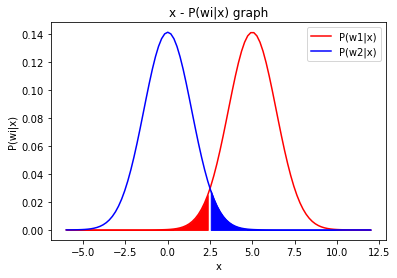

descision boundary: 2.5


In [2]:
def gaussian(X, mean=0, variance=1):
    return  np.exp(-(X-mean)**2/(2*variance))/np.sqrt(2*np.pi*variance)

mu_w1 = 5; mu_w2 = 0; variance = 2
prior_w1 = prior_w2 = 0.5
desc_boundary = (mu_w1+mu_w2)/2 - (variance**2*(np.log(prior_w1)-np.log(prior_w2))/(mu_w1-mu_w2))

X = np.linspace(-6, 12, 100)
Y_w1 = prior_w1*gaussian(X, mu_w1, variance)
Y_w2 = prior_w2*gaussian(X, mu_w2, variance)
plt.plot(X,Y_w1,"r")
plt.plot(X,Y_w2,"b")
plt.legend(['P(w1|x)', 'P(w2|x)'])
plt.title("x - P(wi|x) graph")
plt.xlabel("x")
plt.ylabel("P(wi|x)")
plt.fill_between(X, prior_w1*gaussian(X, mean=5, variance=2), 0,
                 where = (X >= -6) & (X <= desc_boundary),
                 color = 'r')
plt.fill_between(X, prior_w1*gaussian(X, mean=0, variance=2), 0,
                 where = (X >= desc_boundary) & (X <= 12),
                 color = 'b')
plt.show()
print("descision boundary:", desc_boundary)

&emsp; **T3.** What happen to the decision boundary if the cat is happy with a prior of
0.8?

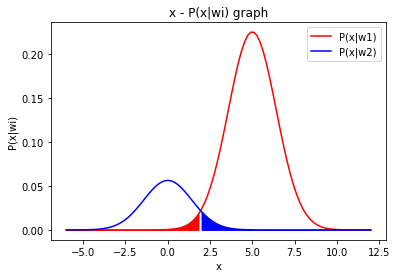

descision boundary: 1.9454822555520437


In [3]:
mu_w1 = 5; mu_w2 = 0; variance = 2
prior_w1 = 0.8; prior_w2 = 0.2
desc_boundary = (mu_w1 + mu_w2)/2 - variance*((np.log(prior_w1) - np.log(prior_w2))/(mu_w1-mu_w2))

X = np.linspace(-6, 12, 100)
Y_w1 = prior_w1*gaussian(X, mu_w1, variance)
Y_w2 = prior_w2*gaussian(X, mu_w2, variance)
plt.plot(X,Y_w1,"r")
plt.plot(X,Y_w2,"b")
plt.legend(['P(x|w1)', 'P(x|w2)'])
plt.title("x - P(x|wi) graph")
plt.xlabel("x")
plt.ylabel("P(x|wi)")
plt.fill_between(X, prior_w1*gaussian(X, mu_w1, variance), 0,
                 where = (X >= -6) & (X <= desc_boundary),
                 color = 'r')
plt.fill_between(X, prior_w2*gaussian(X, mu_w2, variance), 0,
                 where = (X >= desc_boundary) & (X <= 12),
                 color = 'b')
plt.show()
print("descision boundary:", desc_boundary)

&emsp; **OT2.** For the ordinary case of $P(x|w_1) = N(\mu_1, \sigma^2), P(x|w_2) = N(\mu_2, \sigma^2),
p(w_1) = p(w_2) = 0.5$, prove that the decision boundary is at $x = \frac{\mu_1 + \mu_2}{2}$ <br>
If the student changed his model to <br>
$P(x|w_1) = N(5, 2)$ <br>
$P(x|w_2) = N(0, 4)$

\begin{equation}
\begin{split}
    P(x|w_1)P(w_1) & \;\; = \;\; & P(x|w_2)P(w_2) \\
    \frac{exp\left( -\frac{(x-\mu_1)^2}{\sigma^2} \right)}{\sqrt{2\pi\sigma^2}}P(w_1) & \;\; = \;\; & \
    \frac{exp\left( -\frac{(x-\mu_2)^2}{\sigma^2} \right)}{\sqrt{2\pi\sigma^2}}P(w_2)\\
    exp\left( -\frac{(x-\mu_1)^2}{\sigma^2} \right) & \;\; = \;\; & exp\left( -\frac{(x-\mu_2)^2}{\sigma^2} \right)\\
    -\frac{(x-\mu_1)^2}{\sigma^2} & \;\; = \;\; & -\frac{(x-\mu_2)^2}{\sigma^2} \\
    (x-\mu_1)^2-(x-\mu_2)^2 & \;\; = \;\; & 0 \\
    (2x-\mu_1-\mu_2)(\mu_2+\mu_1) & \;\; = \;\; & 0 \\
    2x-\mu_1-\mu_2 & \;\; = \;\; & 0 \\
    x & \;\; = \;\; & \frac{\mu_1 + \mu_2}{2} \\
\end{split}
\end{equation}

&emsp;&emsp; $\bullet$ Plot the posteriors values of the two classes on the same axis. What is the
decision boundary for this classifier? Assume equal prior probabilities.

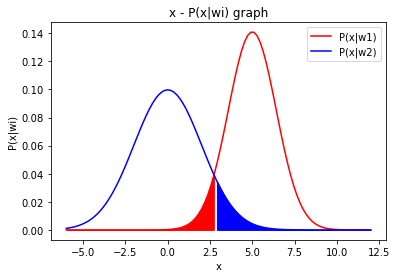

descision boundary: 2.735525571506237


In [4]:
mu_w1 = 5; mu_w2 = 0; variance_1 = 2; variance_2 = 4
prior_w1 = 0.5; prior_w2 = 0.5

# from a long long equation of decision boundary from any 2 gaussian distributions N(mu_1,var_1), N(mu_2,var_2)
# throw the equation in wolframalpha
# we get x = 10 - sqrt( 50 + ln(16) )
desc_boundary = 10 - np.sqrt( 50 + np.log(16) )

X = np.linspace(-6, 12, 100)
Y_w1 = prior_w1*gaussian(X, mu_w1, variance_1)
Y_w2 = prior_w2*gaussian(X, mu_w2, variance_2)
plt.plot(X,Y_w1,"r")
plt.plot(X,Y_w2,"b")
plt.legend(['P(x|w1)', 'P(x|w2)'])
plt.title("x - P(x|wi) graph")
plt.xlabel("x")
plt.ylabel("P(x|wi)")
plt.fill_between(X, prior_w1*gaussian(X, mu_w1, variance_1), 0,
                 where = (X >= -6) & (X <= desc_boundary),
                 color = 'r')
plt.fill_between(X, prior_w2*gaussian(X, mu_w2, variance_2), 0,
                 where = (X >= desc_boundary) & (X <= 12),
                 color = 'b')
plt.show()
print("descision boundary:", desc_boundary)

## Employee Attrition Prediction
### The data
For each employee, 34 features are provided. We will use these features to predict each employee attrition e.g whether the employee will leave the company (**yes** for leaving, no for staying) <br>
Notable features are:
- Education: 1 ’Below College’, 2 ’College’, 3 ’Bachelor’, 4 ’Master’, 5 ’Doctor’.
- Environment Satisfaction: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- Job Involvement: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- Job Satisfaction: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- Performance Rating: 1 ’Low’, 2 ’Good’, 3 ’Excellent’, 4 ’Outstanding’.
- Relationship Satisfaction: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- WorkLifeBalance: 1 ’Bad’, 2 ’Good’, 3 ’Better’, 4 ’Best’.

### The database
First let’s look at the given data file **hr-employee-attrition-with-null.csv.**
Load the data using pandas. Use describe() and head() to get a sense of what
the data is like. Our target of prediction is **Attrition**. Other columns are our
input features.

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv").drop(["Unnamed: 0"],axis=1)

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,2.072279,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,1.105828,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Data cleaning
There are many missing values in this database. They are represented with
NaN. In the previous homework, we filled the missing values with the mean,
median, or mode values. That is because classifiers such as logistic regression
cannot deal with missing feature values. However, for the case of Naive Bayes
which we will use in this homework compares $\prod_{i} p(x_i|class)$ and treat each $x_i$
as independent features. Thus, if a feature i is missing, we can drop that term
from the comparison without having to guess what the missing feature is.
First, convert the yes and no in this data table to 1 and 0. Then, we have to
convert each categorical feature to number.

In [8]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
for col in df.columns:
    df[col] = pd.Categorical(df[col]).codes

We will also drop the employee numbers.

In [9]:
df = df.drop(columns = "EmployeeNumber")

There is no standard rule on how much data you should segment into as training
and test set. But for now let’s use 90% training 10% testing. Select 10% of the
is Attrition == yes and 10% of the is Attrition == no as your testing set,
**test_set**. Then, use the rest of the data as your training set, **train_set**.

In [10]:
X = df.copy()
y = df["Attrition"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=42)

In [11]:
X_train_c0 = X_train[X_train["Attrition"]==0]
X_train_c1 = X_train[X_train["Attrition"]==1]

### Histogram discretization
In class, we learned that in order to create a Bayes Classifier we first need
to estimate the posterior or likelihood probability distributions. The simplest
way to estimate probability distributions is via histograms. To do histogram
estimation, we divide the entire data space into a finite number of bins. Then,
we count how many data points are there in each bin and normalize using the
total number of data points (so that the probability sums to 1). Since we are
grouping a continuous valued feature into a finite number of bins, we can also
call this process, discretization. <br>
The following code create a histogram of a column col from **train_set**


In [12]:
y_train.value_counts()

0    1110
1     213
Name: Attrition, dtype: int64

In [13]:
y_test.value_counts()

0    123
1     24
Name: Attrition, dtype: int64

&emsp; **T4.** Observe the histogram for Age, MonthlyIncome and DistanceFromHome.
How many bins have zero counts? Do you think this is a good discretization?
Why?

In [14]:
def histogram(X_c0, X_c1, col, bin=40, plot=True):
    train_col_no_nan_c0 = X_c0[~np.isnan(X_c0[col])][col]
    train_col_no_nan_c1 = X_c1[~np.isnan(X_c1[col])][col]
    
    hist_c0, bin_edge_c0 = np.histogram(train_col_no_nan_c0, bin)
    hist_c1, bin_edge_c1 = np.histogram(train_col_no_nan_c1, bin)
    
    if plot:
        plt.fill_between(bin_edge_c0.repeat(2)[1:-1],hist_c0.repeat(2),facecolor="red")
        plt.fill_between(bin_edge_c1.repeat(2)[1:-1],hist_c1.repeat(2),facecolor="blue")
        plt.show()
    
    zero_count_c0 = (np.bincount(np.digitize(train_col_no_nan_c0, bin_edge_c0)) == 0).sum()-1
    zero_count_c1 = (np.bincount(np.digitize(train_col_no_nan_c1, bin_edge_c1)) == 0).sum()-1
    
    c0_data = [hist_c0, bin_edge_c0, zero_count_c0]
    c1_data = [hist_c1, bin_edge_c1, zero_count_c1]
    
    data = np.array([c0_data, c1_data], dtype=object)
    if plot:
        print(f"{col} class0 zero count :",zero_count_c0)
        print(f"{col} class1 zero count :",zero_count_c1)
    
    # data [ [hist_c0, be_c0, zc_c0]
    #        [hist_c1, be_c1, zc_c1] ]
    
    return data

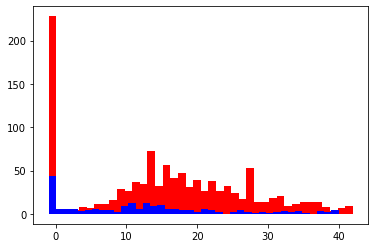

Age class0 zero count : 0
Age class1 zero count : 3


In [15]:
data = histogram(X_train_c0, X_train_c1, "Age", bin=40)

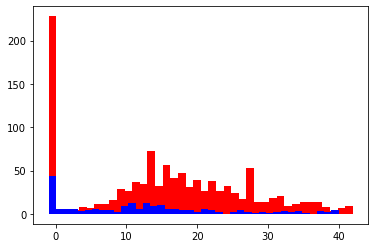

Age class0 zero count : 0
Age class1 zero count : 3


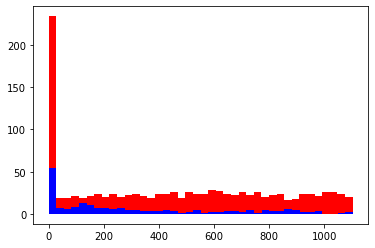

MonthlyIncome class0 zero count : 0
MonthlyIncome class1 zero count : 2


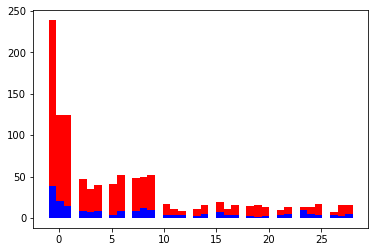

DistanceFromHome class0 zero count : 11
DistanceFromHome class1 zero count : 11


In [16]:
for col in ["Age", "MonthlyIncome","DistanceFromHome"]:
    data = histogram(X_train_c0, X_train_c1, col, bin=40)

From histograms, bins = 10 is good for Age and MonthlyIncome but is not good for DistanceFromHome because a good discretization is have less zero count bin.

&emsp; **T5.** Can we use a Gaussian to estimate this histogram? Why? What about a
Gaussian Mixture Model (GMM)?
The above discretization equally segments the space into equally spaced bins.
This is the best method to segment if you know nothing about the data. Still,
doing so may leave us with many bins with zero counts when we have too little
data. To prevent this issue, we might assume that the distribution of our data
is Normal then draw the probabilities of each data point from this distribution 
instead. We will do this later. For now, do <br>
&emsp; 1) First set the number of bins to 10 for Age, MonthlyIncome and DistanceFromHome. Make numbers of bin a parameter as we will change this later. <br>
&emsp; 2) Bin each values in the training set into bins using the function **np.digitize**, then count the number in each bins using **np.bincount**. Be careful with the maximum and minimum values, your first bin should cover −inf, and your final bin should cover inf, so that you can handle test data that might be outside of the minimum and maximum values. <br>
You do not need to submit anything for this task. You might want to make this
a function so that you can change the number of bins

We should not use Gaussian to estimate this histogram because the data is not normally distributed. <br>
We can use GMM because we can create any function with combination of gaussian distribution. <br>

&emsp; **T6.** Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

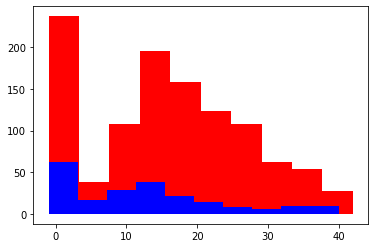

Age class0 zero count : 0
Age class1 zero count : 0


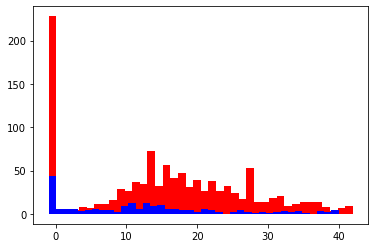

Age class0 zero count : 0
Age class1 zero count : 3


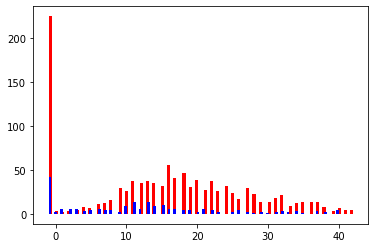

Age class0 zero count : 57
Age class1 zero count : 62


In [17]:
for bin in [10, 40, 100]:
    data = histogram(X_train_c0, X_train_c1, "Age", bin)

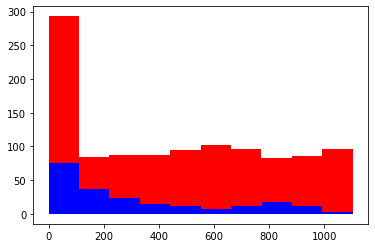

MonthlyIncome class0 zero count : 0
MonthlyIncome class1 zero count : 0


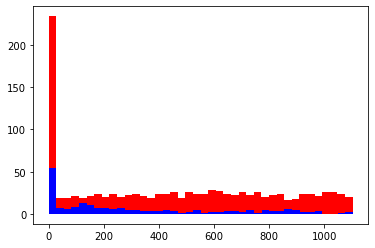

MonthlyIncome class0 zero count : 0
MonthlyIncome class1 zero count : 2


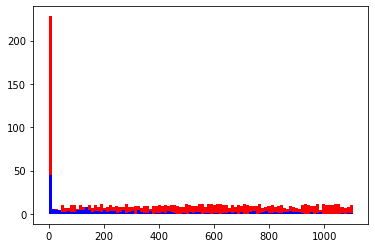

MonthlyIncome class0 zero count : 0
MonthlyIncome class1 zero count : 23


In [18]:
for bin in [10, 40, 100]:
    data = histogram(X_train_c0, X_train_c1, "MonthlyIncome", bin)

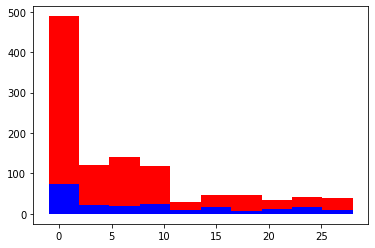

DistanceFromHome class0 zero count : 0
DistanceFromHome class1 zero count : 0


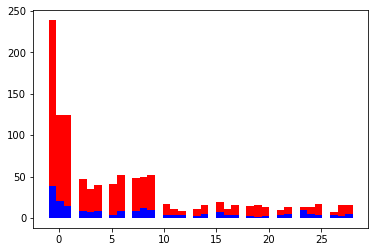

DistanceFromHome class0 zero count : 11
DistanceFromHome class1 zero count : 11


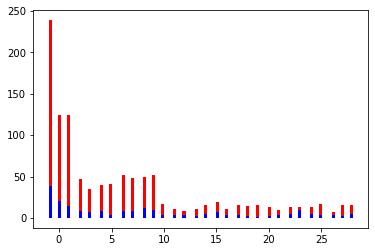

DistanceFromHome class0 zero count : 71
DistanceFromHome class1 zero count : 71


In [19]:
for bin in [10, 40, 100]:
    data = histogram(X_train_c0, X_train_c1, "DistanceFromHome", bin)

"Age": 40 <br>
"MonthlyIncome": 40 <br>
"DistanceFromHome": 10 <br>
Have many bins and not contain zero in bin.

&emsp; **T7.** For the rest of the features, which one should be discretized? What are the
criteria for choosing whether we should discretize a feature or not? Answer this
and discretize those features into 10 bins each. In other words, figure out the
bin edge for each feature, then use digitize() to convert the features to discrete
values.

The criteria that feature is discretized or not is a number of zero bin when generating a histogram <br>
Let discretized features are feature which does not have zero count bins when plot with histogram 10 bins.

In [20]:
discretized = []
non_discretized = []
for col in X_train.columns:
    data = histogram(X_train_c0, X_train_c1, col, bin=10, plot=False)
    zc_c0 = data[0][2]
    zc_c1 = data[1][2]
    if zc_c0 > 0 or zc_c1 > 0:
        non_discretized.append(col)
    else:
        discretized.append(col)

In [21]:
discretized

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'YearsSinceLastPromotion']

In [22]:
non_discretized

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

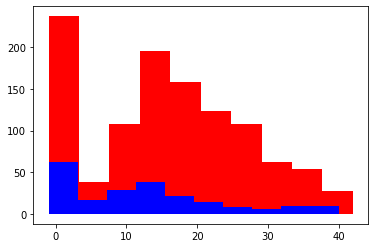

Age class0 zero count : 0
Age class1 zero count : 0


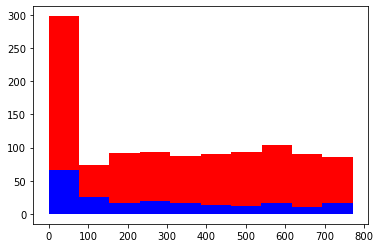

DailyRate class0 zero count : 0
DailyRate class1 zero count : 0


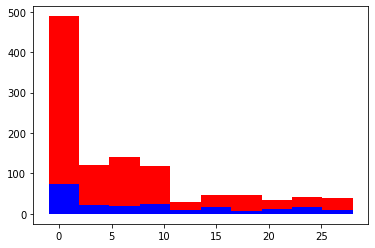

DistanceFromHome class0 zero count : 0
DistanceFromHome class1 zero count : 0


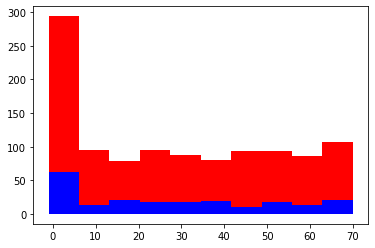

HourlyRate class0 zero count : 0
HourlyRate class1 zero count : 0


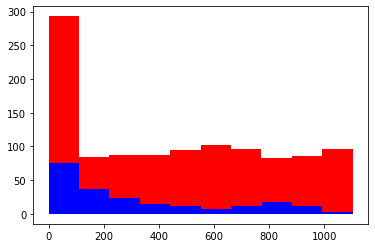

MonthlyIncome class0 zero count : 0
MonthlyIncome class1 zero count : 0


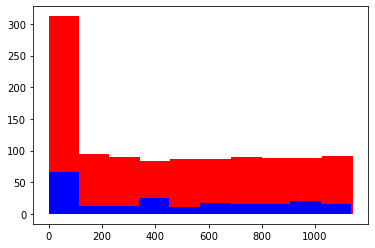

MonthlyRate class0 zero count : 0
MonthlyRate class1 zero count : 0


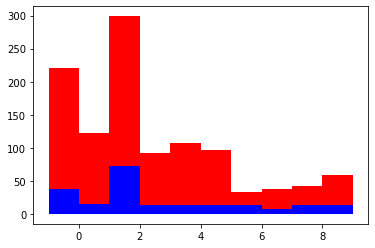

NumCompaniesWorked class0 zero count : 0
NumCompaniesWorked class1 zero count : 0


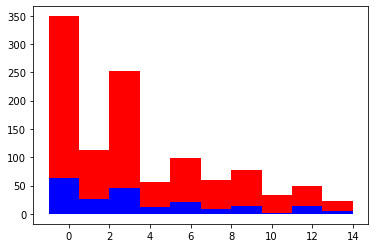

PercentSalaryHike class0 zero count : 0
PercentSalaryHike class1 zero count : 0


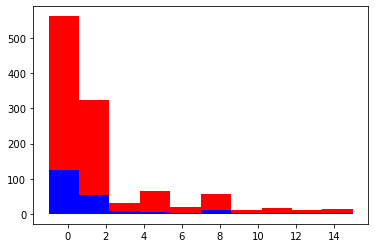

YearsSinceLastPromotion class0 zero count : 0
YearsSinceLastPromotion class1 zero count : 0


In [23]:
for col in discretized:
    data = histogram(X_train_c0, X_train_c1, col, bin=10)

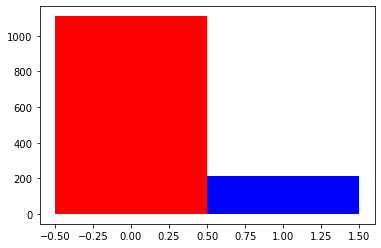

Attrition class0 zero count : 0
Attrition class1 zero count : 0


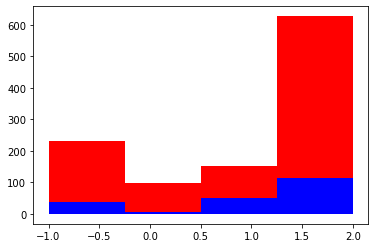

BusinessTravel class0 zero count : 1
BusinessTravel class1 zero count : 1


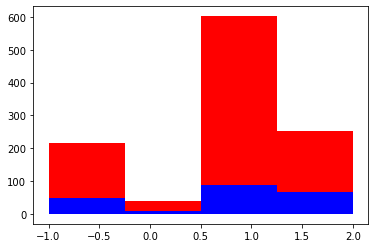

Department class0 zero count : 1
Department class1 zero count : 1


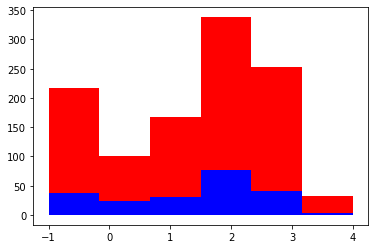

Education class0 zero count : 1
Education class1 zero count : 1


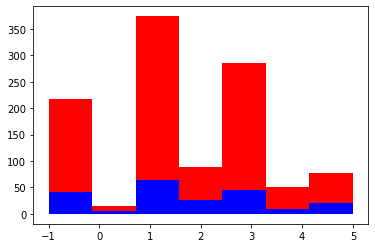

EducationField class0 zero count : 1
EducationField class1 zero count : 1


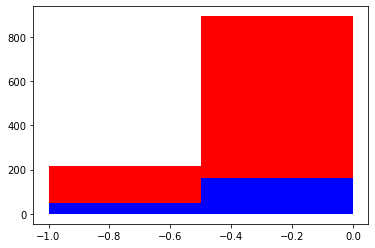

EmployeeCount class0 zero count : 1
EmployeeCount class1 zero count : 1


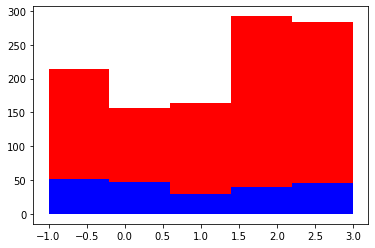

EnvironmentSatisfaction class0 zero count : 1
EnvironmentSatisfaction class1 zero count : 1


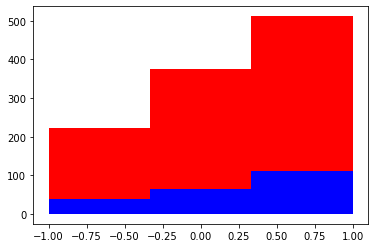

Gender class0 zero count : 1
Gender class1 zero count : 1


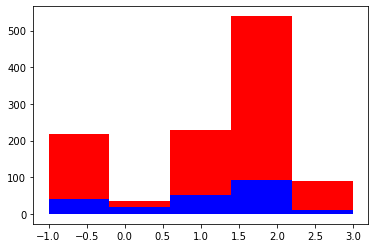

JobInvolvement class0 zero count : 1
JobInvolvement class1 zero count : 1


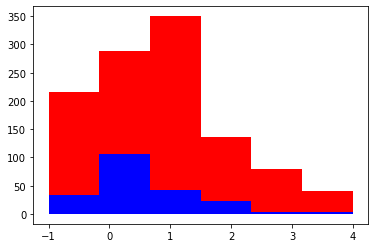

JobLevel class0 zero count : 1
JobLevel class1 zero count : 1


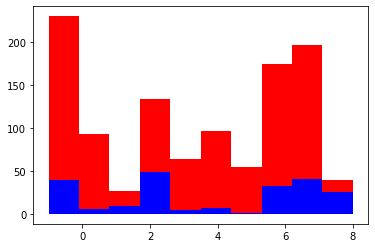

JobRole class0 zero count : 1
JobRole class1 zero count : 1


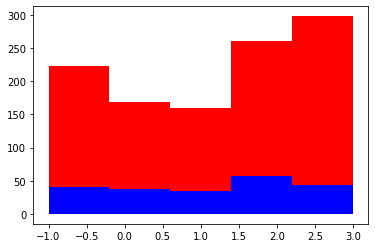

JobSatisfaction class0 zero count : 1
JobSatisfaction class1 zero count : 1


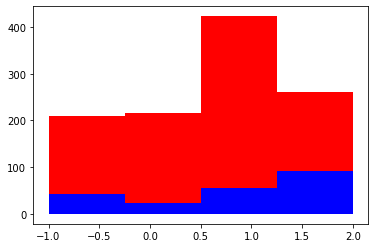

MaritalStatus class0 zero count : 1
MaritalStatus class1 zero count : 1


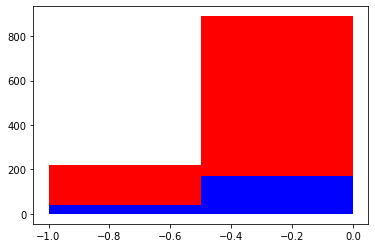

Over18 class0 zero count : 1
Over18 class1 zero count : 1


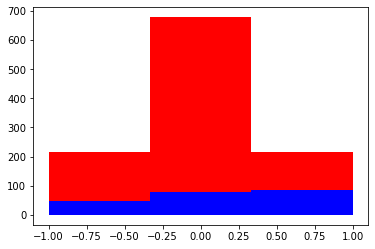

OverTime class0 zero count : 1
OverTime class1 zero count : 1


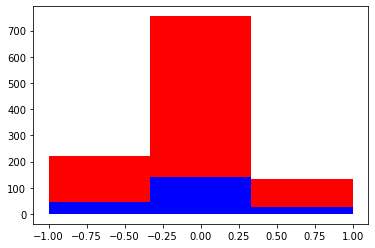

PerformanceRating class0 zero count : 1
PerformanceRating class1 zero count : 1


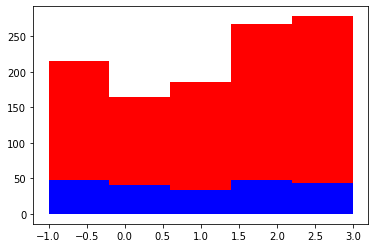

RelationshipSatisfaction class0 zero count : 1
RelationshipSatisfaction class1 zero count : 1


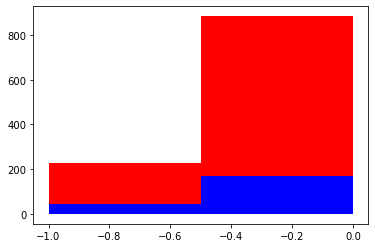

StandardHours class0 zero count : 1
StandardHours class1 zero count : 1


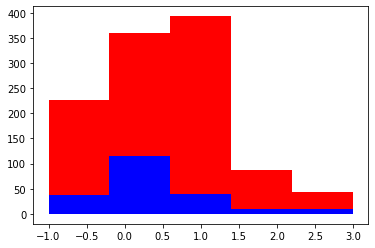

StockOptionLevel class0 zero count : 1
StockOptionLevel class1 zero count : 1


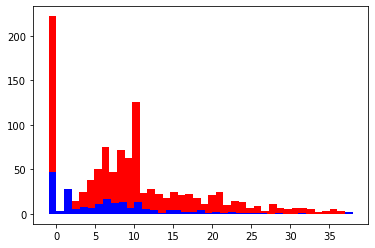

TotalWorkingYears class0 zero count : 1
TotalWorkingYears class1 zero count : 9


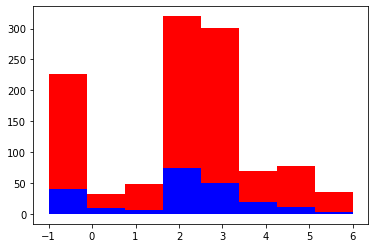

TrainingTimesLastYear class0 zero count : 1
TrainingTimesLastYear class1 zero count : 1


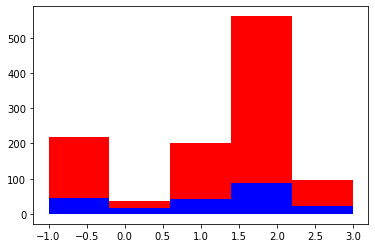

WorkLifeBalance class0 zero count : 1
WorkLifeBalance class1 zero count : 1


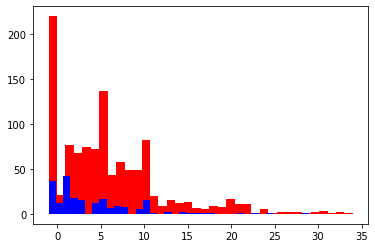

YearsAtCompany class0 zero count : 1
YearsAtCompany class1 zero count : 14


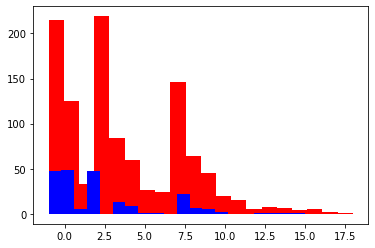

YearsInCurrentRole class0 zero count : 1
YearsInCurrentRole class1 zero count : 5


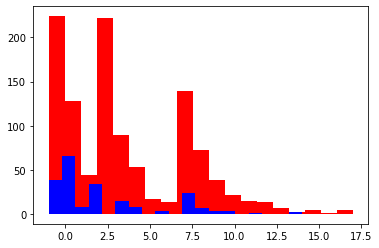

YearsWithCurrManager class0 zero count : 1
YearsWithCurrManager class1 zero count : 7


In [24]:
for col in non_discretized:
    data = histogram(X_train_c0, X_train_c1, col, bin=X_train_c0[col].unique().shape[0])

### The MLE for the likelihood distribution of discretized histograms
We would like to build a Naive Bayes classifier which compares the posterior
$p(leave|x_i)$ against $p(stay|x_i)$. However, figuring out $p(class|x_i)$ is often hard
(not true for this case). Thus, we turn to the likelihood $p(x_i|class)$, which can
be derived from the discretized histograms.

&emsp; **T8.** What kind of distribution should we use to model histograms? (Answer
a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome,
JobRole, HourlyRate, and MaritalStatus for different Attrition values.

We use Multinomial Distribution to model histograms. <br>

From likelihood using Multinomial distribution. <br>
\begin{equation}
\begin{split}
    P(x|w) & \;\; = \;\; & P(x_1x_2...x_n|p_1p_2...p_n) & \;\; = \;\; & \frac{n!}{x_1!x_2!\cdots x_n!}\left( p_1^{x_1}p_2^{x_2}\cdots p_n^{x_n} \right)\\ 
\end{split}
\end{equation}

To find the MLE of this likelihood distribution, we use Lagrange Multiplier Method. <br><br>

&emsp;$Given \; functions \; f(x_1,...,x_n) \; and \; g(x_1,...,x_n),$ <br>
&emsp;$the \; critical \; points \; of \; f \; restricted \; to \; the \; set \; g \; = \; 0 \; are \; solutions \; to \; equations:$
\begin{equation}
\begin{split}
    \frac{\partial f}{\partial x_i}(x_1,...,x_n) & \; = \; & \lambda\frac{\partial g}{\partial x_i}(x_1,...,x_n) \;\forall i \\
    g(x_1,...,x_n) & \; = \; & 0
\end{split}
\end{equation}

From likelihood, we get log likelihood is:
\begin{equation}
\begin{split}
    log \; P(x_1x_2...x_n|p_1p_2...p_n) & \; = \; & log(n!) - \sum_ilog(x_i!) + \sum_i x_ilog(p_i) + \lambda(1-\sum_ip_i) \\
    \frac{\partial logP}{\partial p_i} & \; = 0 = \; & \frac{x_i}{p_i} - \lambda & and, \\
    \frac{\partial logP}{\partial\lambda} & \; = 0 = \; & 1-\sum_ip_i\\
    &\because \; \lambda = \frac{x_i}{p_i} \\
    &\therefore \; p_i = \frac{x_i}{\lambda} \\
    &\because \sum_ip_i = 1 \\
    &\therefore \; \lambda = n \\
    &\because p_i  = \frac{x_i}{n}
\end{split}
\end{equation}

MonthlyIncome


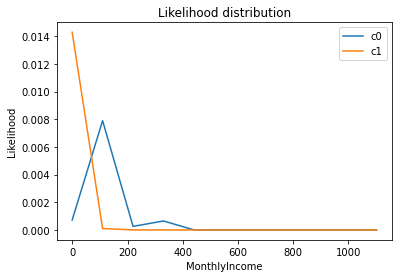

JobRole


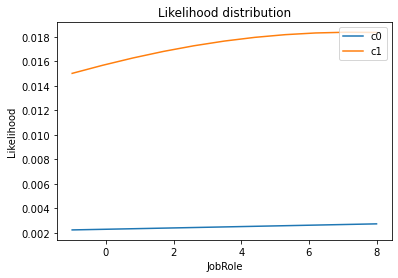

HourlyRate


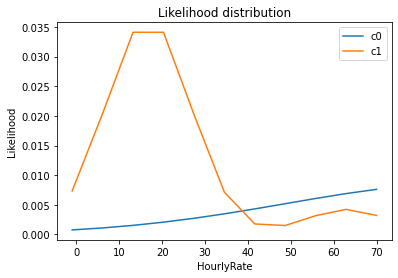

MaritalStatus


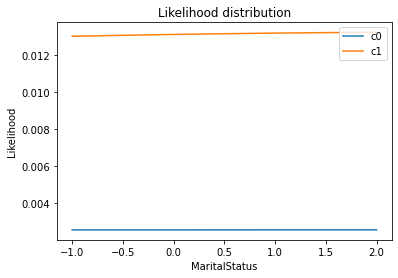

In [25]:
for col in ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']:
    data = histogram(X_train_c0, X_train_c1, col, bin=10, plot=False)
    hist_c0 = data[0][0]; be_c0 = data[0][1] 
    hist_c1 = data[1][0]; be_c1 = data[1][1] 
    print(col)
    density_c0 = kde.gaussian_kde(hist_c0)
    density_c1 = kde.gaussian_kde(hist_c1)
    plt.plot(be_c0, density_c0(be_c0))
    plt.plot(be_c0, density_c1(be_c1))
    plt.title("Likelihood distribution")
    plt.xlabel(col)
    plt.ylabel("Likelihood")
    plt.legend(["c0","c1"], loc='upper right')
    plt.show()

&emsp; **T9.** What is the prior distribution of the two classes?

In [26]:
y_c0 = y_train.value_counts()[0]
y_c1 = y_train.value_counts()[1]

In [27]:
prior_leave = y_c1/(y_c0 + y_c1)
prior_stay =  y_c0/(y_c0 + y_c1)
log_prior_leave = np.log(prior_leave)
log_prior_stay = np.log(prior_stay)

In [28]:
print(prior_leave, prior_stay)

0.16099773242630386 0.8390022675736961


### Naive Bayes classification
We are now ready to build our Naive Bayes classifier. Which makes a decision
according to

$$ H(x) = \frac{p(leave)}{p(stay)}\prod_{i=1}\frac{p(x_i|leave)}{p(x_i|stay)}$$

If $H(x)$ is larger than 1, then classify it as leave. If H(x) is smaller than 1, then classify it as stay.
Note we often work in the log scale to prevent floating point underflow. In other words,

$$ lH(x) = logp(leave) - logp(stay) + \sum_{i=1}[logp(x_i|leave) − logp(x_i|stay)] $$

If $lH(x)$ is larger than 0, then classify it as leave. If $lH(x)$ is smaller than 0,
then classify it as stay

&emsp; **T10.** If we use the current Naive Bayes with our current Maximum Likelihood
Estimates, we will find that some $P(x_i|attrition)$ will be zero and will result in
the entire product term to be zero. Propose a method to fix this problem.


We can bound it ($P(x_i|attrition) \; that \; is \; 0$) to minimum number that converge to 0 likes $10^{-15} (flooring)$

&emsp; **T11.** Implement your Naive Bayes classifier. Use the learned distributions
to classify the **test_set**. Don’t forget to allow your classifier to handle missing
values in the test set. Report the overall Accuracy. Then, report the Precision,
Recall, and F score for detecting attrition. See Lecture 1 for the definitions of
each metric

In [29]:
X_test = X_test.drop("Attrition", axis=1)

In [30]:
def find_bin(x, bin_edge):
    distance = bin_edge[-1] - bin_edge[-2]
    for i in range(len(bin_edge)):
        if (bin_edge[i] <= x) and (x <= bin_edge[i]+distance):
            return i-1
    return -1

In [31]:
def get_binsize(hist, pos):
    if pos == -1:
        return 0
    else:
        return hist[pos]

In [32]:
def NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized, bin=10):
    all_data = []
    
    for col in X_test.columns:
        if col in discretized:
            data = histogram(X_train_c0, X_train_c1, col, bin, plot=False)
        else:
            data = histogram(X_train_c0, X_train_c1, col, bin=X_train_c0[col].unique().shape[0], plot=False)
        data[0][0] = np.append(data[0][0],0)
        data[1][0] = np.append(data[1][0],0)
        all_data.append(data)
        
    pred = np.zeros(X_test.shape[0])
    for idx, col in enumerate(X_test.columns):
        
        data_c0 = all_data[idx][0]; data_c1 = all_data[idx][1]
        hist_c0 = data_c0[0]; be_c0 = data_c0[1]; hist_c1 = data_c1[0]; be_c1 = data_c1[1]
        
        #find likelihood
        binPos_c0 = np.digitize(X_test[col], be_c0) - 1
        binPos_c1 = np.digitize(X_test[col], be_c1) - 1
        
        likelihood_c0 = np.array([hist_c0[i]/hist_c0.sum() for i in binPos_c0])
        likelihood_c1 = np.array([hist_c1[i]/hist_c1.sum() for i in binPos_c1])
        
        #flooring
        likelihood_c0[likelihood_c0==0] = 1e-20
        likelihood_c1[likelihood_c1==0] = 1e-20
        
        #check null
        likelihood_c0[X_test[col]==-1] = 1
        likelihood_c1[X_test[col]==-1] = 1

        
        log_llh_c0 = np.log(likelihood_c0)
        log_llh_c1 = np.log(likelihood_c1)
        pred += log_llh_c1 - log_llh_c0
    pred += log_prior_leave - log_prior_stay
    return pred
    

In [33]:
pred_Mult = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized)

In [34]:
# +----------------+-------+-------+
# | Actual \ Model |   y   |   n   |
# +----------------+-------+-------+
# |        y       |  TP   |  FN   |
# |----------------+-------+-------+
# |        n       |  FP   |  TN   |
# +----------------+-------+-------+

def get_confusionMatrix(pred, y):
    pred = pred.astype(bool)
    y = np.array(y).astype(bool)
    TP = (pred&y).sum()
    FP = (pred&~y).sum()
    TN = (~pred&~y).sum()
    FN = (~pred&y).sum()
    return np.array([[TP, FN],
                    [FP, TN]])

In [35]:
def get_metrics(cfm, show=True):
    TP, FN, FP, TN = cfm.ravel()
    ALL = cfm.ravel().sum()
    
    accuracy = (TP+TN)/ALL
    precision_Pos = 0 if TP+FP == 0 else TP/(TP+FP)
    precision_Neg = 0 if FN+TN == 0 else TN/(FN+TN)
    recall_Pos    = 0 if TP+FN == 0 else TP/(TP+FN)
    recall_Neg    = 0 if FP+TN == 0 else TN/(FP+TN)
    false_alarm   = 0 if FP+TN == 0 else FP/(FP+TN)
    F1_Pos = 0 if precision_Pos + recall_Pos == 0 else (2*precision_Pos*recall_Pos)/(precision_Pos + recall_Pos)
    F1_Neg = 0 if precision_Neg + recall_Neg == 0 else (2*precision_Neg*recall_Neg)/(precision_Neg + recall_Neg)
        
    if show:
        print("accuracy      : ", accuracy)
        print("precision_Pos : ", precision_Pos)
        print("precision_Neg : ", precision_Neg)
        print("recall_Pos    : ", recall_Pos)
        print("recall_Neg    : ", recall_Neg)
        print("false_alarm   : ", false_alarm)
        print("F1_Pos        : ", F1_Pos)
        print("F1_Neg        : ", F1_Neg)
    return [accuracy, precision_Pos, precision_Neg,
            recall_Pos, recall_Neg, false_alarm,
            F1_Pos, F1_Neg]

In [36]:
pred_Mult = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized)

In [37]:
pred_Mult = (pred_Mult >= 0).astype(int)

In [38]:
pred_Mult[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [39]:
cfm_Mult = get_confusionMatrix(pred_Mult ,y_test)
print(cfm_Mult)

[[  5  19]
 [ 14 109]]


In [40]:
metric_Mult  = get_metrics(cfm_Mult)

accuracy      :  0.7755102040816326
precision_Pos :  0.2631578947368421
precision_Neg :  0.8515625
recall_Pos    :  0.20833333333333334
recall_Neg    :  0.8861788617886179
false_alarm   :  0.11382113821138211
F1_Pos        :  0.23255813953488372
F1_Neg        :  0.8685258964143426


### Probability density function
Now, instead of using histogram discretization, we will assume that our features are normally distributed. In other words, for certain feature types, $P(x_i|attrition)$ is now Normally distributed. By doing so, we can estimate
the mean and standard deviation for each feature and compute the probability
of each test feature by using the Gaussian probability density function instead.
You can do this by calling:


&emsp; **T12.** Use the learned distributions to classify the test set. Report the results
using the same metric as the previous question

In [41]:
def NaiveBayes_Gaussian(X_train_c0, X_train_c1, X_test):
    pred = np.zeros(X_test.shape[0])
    for col in X_test.columns:
        likelihood_c1 = norm(X_train_c1[~np.isnan(X_train_c1[col])][col].mean(), X_train_c1[~np.isnan(X_train_c1[col])][col].std()).pdf(X_test[col])
        likelihood_c0 = norm(X_train_c0[~np.isnan(X_train_c0[col])][col].mean(), X_train_c0[~np.isnan(X_train_c0[col])][col].std()).pdf(X_test[col])
        likelihood_c1[likelihood_c1 == 0] = 1e-20
        likelihood_c0[likelihood_c0 == 0] = 1e-20
        likelihood_c1[X_test[col] == -1] = 1
        likelihood_c0[X_test[col] == -1] = 1
        log_llh_c0 = np.log(likelihood_c0)
        log_llh_c1 = np.log(likelihood_c1)
        pred += log_llh_c1 - log_llh_c0
    pred += log_prior_leave - log_prior_stay
    return pred

In [42]:
pred_Gauss = NaiveBayes_Gaussian(X_train_c0, X_train_c1, X_test)

In [43]:
pred_Gauss = (pred_Gauss >= 0).astype(int)

In [44]:
pred_Gauss[:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
cfm_Gauss = get_confusionMatrix(pred_Gauss ,y_test)
print(cfm_Gauss)

[[  4  20]
 [  8 115]]


In [46]:
metric_Gauss  = get_metrics(cfm_Gauss)

accuracy      :  0.8095238095238095
precision_Pos :  0.3333333333333333
precision_Neg :  0.8518518518518519
recall_Pos    :  0.16666666666666666
recall_Neg    :  0.9349593495934959
false_alarm   :  0.06504065040650407
F1_Pos        :  0.2222222222222222
F1_Neg        :  0.8914728682170544


### Baseline comparison
In machine learning, we need to be able to evaluate how good our model is. We
usually compare our model with a different model and show that our model is
better. Sometimes we do not have a candidate model to evaluate our method
against. In this homework, we will look at two simple baselines, the random
choice, and the majority rule.

&emsp; **T13.** The random choice baseline is the accuracy if you make a random guess
for each test sample. Give random guess (50% leaving, and 50% staying) to the
test samples. Report the overall Accuracy. Then, report the Precision, Recall,
and F score for attrition prediction using the random choice baseline.


In [47]:
pred_baseline = np.random.randint(2, size=X_test.shape[0])
cfm_baseline = get_confusionMatrix(pred_baseline ,y_test)
print(cfm_baseline)

[[12 12]
 [59 64]]


In [48]:
metric_baseline = get_metrics(cfm_baseline)

accuracy      :  0.5170068027210885
precision_Pos :  0.16901408450704225
precision_Neg :  0.8421052631578947
recall_Pos    :  0.5
recall_Neg    :  0.5203252032520326
false_alarm   :  0.4796747967479675
F1_Pos        :  0.25263157894736843
F1_Neg        :  0.64321608040201


&emsp; **T14.** The majority rule is the accuracy if you use the most frequent class
from the training set as the classification decision. Report the overall Accuracy.
Then, report the Precision, Recall, and F score for attrition prediction using
the majority rule baseline.


In [49]:
y_train.value_counts()

0    1110
1     213
Name: Attrition, dtype: int64

In [50]:
pred_majority = np.zeros(X_test.shape[0])
cfm_majority = get_confusionMatrix(pred_majority ,y_test)
print(cfm_majority)

[[  0  24]
 [  0 123]]


In [51]:
metric_majority = get_metrics(cfm_majority)

accuracy      :  0.8367346938775511
precision_Pos :  0
precision_Neg :  0.8367346938775511
recall_Pos    :  0.0
recall_Neg    :  1.0
false_alarm   :  0.0
F1_Pos        :  0
F1_Neg        :  0.9111111111111111


&emsp; **T15.** Compare the two baselines with your Naive Bayes classifier.

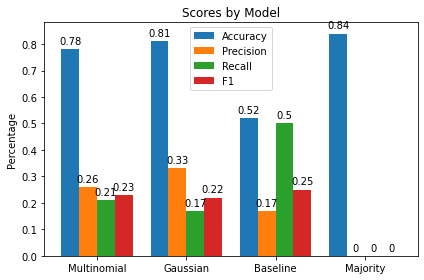

In [52]:
labels = ['Multinomial', 'Gaussian', 'Baseline', 'Majority']
accs_models = [metric_Mult[0], metric_Gauss[0], metric_baseline[0], metric_majority[0]]
pPs_models = [metric_Mult[1], metric_Gauss[1], metric_baseline[1], metric_majority[1]]
rPs_models = [metric_Mult[3], metric_Gauss[3], metric_baseline[3], metric_majority[3]]
F1Ps_models = [metric_Mult[6], metric_Gauss[6], metric_baseline[6], metric_majority[6]]

x = np.array([1, 2, 3, 4, 5])
# Obtain array of square of each element in x
roundVal = lambda t: round(t, 2)
accs_models = np.array([roundVal(xi) for xi in accs_models])
pPs_models = np.array([roundVal(xi) for xi in pPs_models])
rPs_models = np.array([roundVal(xi) for xi in rPs_models])
F1Ps_models = np.array([roundVal(xi) for xi in F1Ps_models])

x = np.arange(len(labels))*2  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-3*width/2, accs_models, width, label='Accuracy')
rects2 = ax.bar(x-width/2, pPs_models, width, label='Precision')
rects3 = ax.bar(x+width/2, rPs_models, width, label='Recall')
rects4 = ax.bar(x+3*width/2, F1Ps_models, width, label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Scores by Model')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

### Threshold finding
In practice, instead of comparing $lH(x)$ against 0, we usually compare against
a threshold, t. We can change the threshold so that we maximize the accuracy,
precision, recall, or F score (depending on which measure we want to optimize).

&emsp; **T16.** Use the following threshold values

find the best accuracy, and F score (and the corresponding thresholds)

In [53]:
t = np.arange(-5, 5, 0.05)

In [54]:
accs = [] ; pPs = [] ; rPs = [] ; F1Ps = [] 
pred_Mult = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized)
for threshold in t:
    pred_Mult_int = (pred_Mult >= threshold)
    cfm = get_confusionMatrix(pred_Mult_int, y_test)
    acc, pP, pN, rP, rN, fA, F1P, F1N = get_metrics(cfm, show=False)
    accs.append(acc)
    pPs.append(pP)
    rPs.append(rP)
    F1Ps.append(F1P)

accs = np.array(accs)
pPs =  np.array(pPs)
rPs =  np.array(rPs) 
F1Ps =  np.array(F1Ps)

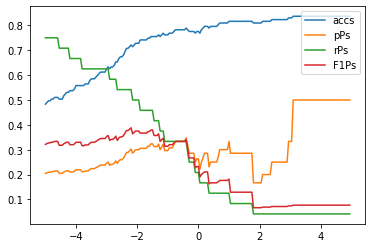

In [55]:
plt.plot(t, accs)
plt.plot(t, pPs)
plt.plot(t, rPs)
plt.plot(t, F1Ps)
plt.legend(["accs","pPs","rPs","F1Ps"])
plt.show()

In [56]:
boundary = 0
max_acc = 0; max_f1 = 0; max_t = 0
for i in range(t.shape[0]):
    if accs[i] + F1Ps[i] > boundary:
        boundary = accs[i] + F1Ps[i]
        max_acc = accs[i]
        max_f1 = F1Ps[i]
        max_t = t[i]

In [57]:
max_acc

0.7551020408163265

In [58]:
max_f1

0.3793103448275862

In [59]:
max_t

-1.5500000000000123

In [60]:
accs = [] ; pPs = [] ; rPs = [] ; F1Ps = [] 
pred_Gauss = NaiveBayes_Gaussian(X_train_c0, X_train_c1, X_test)
for threshold in t:
    pred_Gauss_int = (pred_Gauss >= threshold)
    cfm = get_confusionMatrix(pred_Gauss_int, y_test)
    acc, pP, pN, rP, rN, fA, F1P, F1N = get_metrics(cfm, show=False)
    accs.append(acc)
    pPs.append(pP)
    rPs.append(rP)
    F1Ps.append(F1P)

accs = np.array(accs)
pPs =  np.array(pPs)
rPs =  np.array(rPs) 
F1Ps =  np.array(F1Ps)

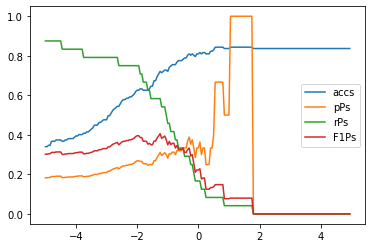

In [61]:
plt.plot(t, accs)
plt.plot(t, pPs)
plt.plot(t, rPs)
plt.plot(t, F1Ps)
plt.legend(["accs","pPs","rPs","F1Ps"])
plt.show()

In [62]:
boundary = 0
max_acc = 0; max_f1 = 0; max_t = 0
for i in range(t.shape[0]):
    if accs[i] + F1Ps[i] > boundary:
        boundary = accs[i] + F1Ps[i]
        max_acc = accs[i]
        max_f1 = F1Ps[i]
        max_t = t[i]

In [63]:
max_acc

0.8095238095238095

In [64]:
max_f1

0.3333333333333333

In [65]:
max_t

-0.3000000000000167

### Receiver Operating Characteristic (RoC) curve
The recall rate (true positive rate) and the false alarm rate can change as we
vary the threshold. The false alarm rate will deteriorate as we decrease the
threshold (more false alarms). On the other hand, the recall rate will improve.
This is also another trade-off machine learning practitioners need to consider.
If we plot the false alarm vs recall as we vary the threshold (false alarm as the
x-axis and recall as the y-axis), we get a plot called the ”Receiver operating
characteristic (RoC) curve.” The RoC curve illustrates the performance of a
binary classifier (Will this person leave? Will this person survive the Titanic?
yes or no) as the threshold is varied. An example RoC curve is shown below

&emsp; **T17.** Plot the RoC of your classifier

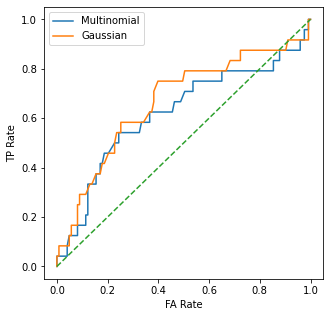

In [66]:
t = np.arange(-100, 100, 0.05)
rPs_Mult = [] ; fAs_Mult = []
rPs_Gauss = [] ; fAs_Gauss = []
pred_Mult = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized)
pred_Gauss = NaiveBayes_Gaussian(X_train_c0, X_train_c1, X_test)
for threshold in t:
    pred_Mult_int = (pred_Mult >= threshold)
    cfm_Mult = get_confusionMatrix(pred_Mult_int, y_test)
    acc, pP, pN, rP_Mult, rN, fA_Mult, F1P, F1N = get_metrics(cfm_Mult, show=False)
    rPs_Mult.append(rP_Mult)
    fAs_Mult.append(fA_Mult)
    
    pred_Gauss_int = (pred_Gauss >= threshold)
    cfm_Gauss = get_confusionMatrix(pred_Gauss_int, y_test)
    acc, pP, pN, rP_Gauss, rN, fA_Gauss, F1P, F1N = get_metrics(cfm_Gauss, show=False)
    rPs_Gauss.append(rP_Gauss)
    fAs_Gauss.append(fA_Gauss)

rPs_Mult =  np.array(rPs_Mult)
fAs_Mult =  np.array(fAs_Mult) 
rPs_Gauss =  np.array(rPs_Gauss)
fAs_Gauss =  np.array(fAs_Gauss) 

plt.figure(figsize=(5, 5))
plt.plot(fAs_Mult, rPs_Mult)
plt.plot(fAs_Gauss, rPs_Gauss)
plt.plot([0,1], [0,1],'--')
plt.xlabel("FA Rate")
plt.ylabel("TP Rate")
plt.legend(["Multinomial","Gaussian"])
plt.show()

&emsp; **T18.** Change the number of discretization bins to 5. What happens to the
RoC curve? Which discretization is better? The number of discretization bins
can be considered as a hyperparameter, and must be chosen by comparing the
final performance.

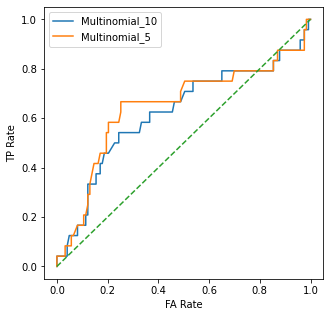

In [67]:
t = np.arange(-100, 100, 0.05)
rPs_Mult_10 = [] ; fAs_Mult_10 = []
rPs_Mult_5 = [] ; fAs_Mult_5 = []
pred_Mult_10 = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized)
pred_Mult_5 = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized, bin=5)
for threshold in t:
    pred_Mult_10_int = (pred_Mult_10 >= threshold)
    cfm_Mult_10 = get_confusionMatrix(pred_Mult_10_int, y_test)
    acc, pP, pN, rP_Mult_10, rN, fA_Mult_10, F1P, F1N = get_metrics(cfm_Mult_10, show=False)
    rPs_Mult_10.append(rP_Mult_10)
    fAs_Mult_10.append(fA_Mult_10)
    
    pred_Mult_5_int = (pred_Mult_5 >= threshold)
    cfm_Mult_5 = get_confusionMatrix(pred_Mult_5_int, y_test)
    acc, pP, pN, rP_Mult_5, rN, fA_Mult_5, F1P, F1N = get_metrics(cfm_Mult_5, show=False)
    rPs_Mult_5.append(rP_Mult_5)
    fAs_Mult_5.append(fA_Mult_5)

rPs_Mult_10 =  np.array(rPs_Mult_10)
fAs_Mult_10 =  np.array(fAs_Mult_10) 
rPs_Mult_5 =  np.array(rPs_Mult_5)
fAs_Mult_5 =  np.array(fAs_Mult_5) 

plt.figure(figsize=(5, 5))
plt.plot(fAs_Mult_10, rPs_Mult_10)
plt.plot(fAs_Mult_5, rPs_Mult_5)
plt.plot([0,1], [0,1],'--')
plt.xlabel("FA Rate")
plt.ylabel("TP Rate")
plt.legend(["Multinomial_10","Multinomial_5"])
plt.show()

By changing the number of discretization bins to 5, the RoC curve will increase faster than the 10 bins. The Naive Bayes with 5 discretization bins is better than The Naive Bayes with 10 because at the same FA Rate, Mult_5 have TP Rate more than Mult_10

&emsp; **T19.** Submit your code (.py or .ipynb) on mycourseville.
If you’ve made it this far, **congratulations!** you’ve just created simple models
that can help HR deal with one of their biggest problems. Simple, isn’t it?
This is a real world task with real implications, and I personally have been
approached by big companies to help with this.

### (Optional) Classifier Variance
Recall, in class, we talked about the variance of a classifier as the training set
changes. In this section, we will evaluate our model if we shuffle the training
and test data. This will give a measure whether our recognizer is good just
because we are lucky (and give statistical significance to our experiments).

&emsp; **OT3.** Shuffle the database, and create new test and train sets. Redo the
entire training and evaluation process 10 times (each time with a new training
and test set). Calculate the mean and variance of the accuracy rate.

In [68]:
metrics = []
for attemp in range(10):
    df = pd.read_csv("https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv").drop(["Unnamed: 0"],axis=1)
    df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
    df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
    for col in df.columns:
        df[col] = pd.Categorical(df[col]).codes
    df = df.drop(columns = "EmployeeNumber")
    X = df.copy()
    y = df["Attrition"].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10)
    X_train_c0 = X_train[X_train["Attrition"]==0]
    X_train_c1 = X_train[X_train["Attrition"]==1]
    y_c0 = y_train.value_counts()[0]
    y_c1 = y_train.value_counts()[1]
    X_test = X_test.drop("Attrition", axis=1)
    prior_leave = y_c1/(y_c0 + y_c1)
    prior_stay =  y_c0/(y_c0 + y_c1)
    log_prior_leave = np.log(prior_leave)
    log_prior_stay = np.log(prior_stay)
    pred_Mult = NaiveBayes_Multinomial(X_train_c0, X_train_c1, X_test, discretized, bin=5)
    pred_Mult = (pred_Mult >= 0).astype(int)
    cfm_Mult = get_confusionMatrix(pred_Mult ,y_test)
    metric_Mult  = get_metrics(cfm_Mult,show=False)
    metrics.append(metric_Mult)
metrics = np.array(metrics)

In [69]:
avg_s = [metrics[:,i].mean() for i in range(8)]
var_s = [metrics[:,i].var() for i in range(8)]
#[accuracy, precision_Pos, precision_Neg, recall_Pos, recall_Neg, false_alarm, F1_Pos, F1_Neg]

In [70]:
avg_acc = avg_s[0]
var_acc = var_s[0]
print(f"mean accuracy: {avg_acc}, variance accuracy: {var_acc}")

mean accuracy: 0.826530612244898, variance accuracy: 0.00042806238141515136
